In [41]:
import pandas as pd
df=pd.read_csv('Wine.csv')
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [42]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [43]:
X=df.drop('Customer_Segment',axis=1)
y=df['Customer_Segment']

print(X)
print(y)


     Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols   
0      14.23        1.71  2.43          15.6        127           2.80  \
1      13.20        1.78  2.14          11.2        100           2.65   
2      13.16        2.36  2.67          18.6        101           2.80   
3      14.37        1.95  2.50          16.8        113           3.85   
4      13.24        2.59  2.87          21.0        118           2.80   
..       ...         ...   ...           ...        ...            ...   
173    13.71        5.65  2.45          20.5         95           1.68   
174    13.40        3.91  2.48          23.0        102           1.80   
175    13.27        4.28  2.26          20.0        120           1.59   
176    13.17        2.59  2.37          20.0        120           1.65   
177    14.13        4.10  2.74          24.5         96           2.05   

     Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue   
0          3.06               

In [44]:
scaler=StandardScaler()
xs=scaler.fit_transform(X)

In [45]:
kmeans=KMeans(n_clusters=2)
data=kmeans.fit_transform(xs)
data

D:\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([[6.07207962, 3.12997197],
       [5.37963398, 2.68191472],
       [5.33873507, 2.60448768],
       [6.71677869, 4.11993156],
       [4.18446426, 2.63374733],
       [5.83730671, 3.27347374],
       [5.32220049, 2.74606742],
       [5.08041021, 2.93305714],
       [5.46402427, 2.86843743],
       [5.45038916, 2.36534558],
       [6.19855177, 3.11960621],
       [4.70452969, 2.37936998],
       [4.91509147, 2.25611297],
       [6.73230239, 4.17016443],
       [7.28759935, 4.48949622],
       [5.22235535, 2.92342822],
       [5.13437493, 3.14093362],
       [4.76936674, 2.68478379],
       [6.61584145, 4.16624273],
       [5.02636963, 2.53029213],
       [5.89086347, 2.77571704],
       [4.24421322, 2.27126253],
       [5.26901166, 1.88245288],
       [4.54397583, 1.5880434 ],
       [4.69509085, 1.77972953],
       [5.40006459, 4.35075954],
       [4.61932671, 2.18538092],
       [4.28969786, 2.13144183],
       [5.07150603, 2.40857645],
       [5.0125015 , 1.94212434],
       [5.

In [46]:
pca=PCA(n_components=2)
dt=pd.DataFrame(pca.fit_transform(xs),columns=["pca1","pca2"])
dt


,pca1,pca2
0,3.316751,-1.443463
1,2.209465,0.333393
2,2.516740,-1.031151
3,3.757066,-2.756372
4,1.008908,-0.869831
...,...,...
173,-3.370524,-2.216289
174,-2.601956,-1.757229
175,-2.677839,-2.760899
176,-2.387017,-2.297347


In [47]:
centers=pca.fit_transform(kmeans.cluster_centers_)

[]

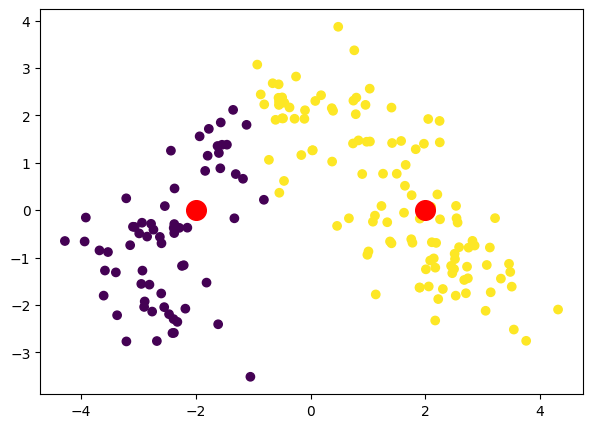

In [49]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7,5))
plt.scatter(dt['pca1'],dt['pca2'],c=kmeans.labels_)
plt.scatter(centers[:,0],centers[:,1],c="red",s=200)
plt.plot()